**Задание 1**

В документе предоставлены реальные данные по одному из проектов для когорт,
установивших игру с 21.09.23 по 28.09.23:
https://www.matryoshka.com/tests/Ad_revenue.xlsx

Судя по этим данным, предположите, как нарастает ревеню в первый месяц жизни у
пользователей игры.

Во сколько раз увеличится ревеню нулевого дня (день установки игры), первого и
третьего дня к 30-му дню?

**Пояснение к таблицe:**

**Лист ad revenue (данные по рекламному заработку):**

* Install_date - дата установки игры пользователем
* Event_date - дата совершения события
* Event_revenue - рекламный заработок
* Platform - платформа
* User_id - уникальный идентификатор пользователя

**Лист installs data (данные по количеству инсталлов)**

* Install_date - дата
* installs - количество инсталлов
* Platform - платформа

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_revenue = pd.read_excel('https://github.com/rdeword/test_matr/raw/main/Ad_revenue.xlsx', sheet_name='ad revenue')

In [33]:
#обработка данных
df_revenue['event_date'] = pd.to_datetime(df_revenue['event_date'])
df_revenue['day_since_install'] = (df_revenue['event_date'] - df_revenue['install_date']).dt.days
df_grouped = df_revenue.groupby('day_since_install')['event_revenue'].sum().reset_index()
#сумма выручки per/day
daily_revenue = df_revenue.groupby('event_date')['event_revenue'].sum().reset_index()

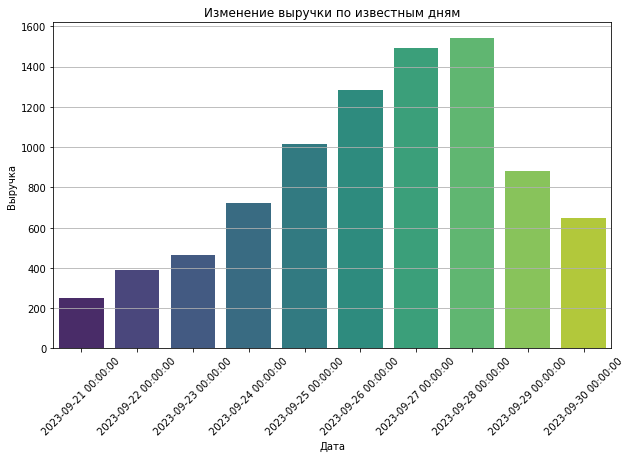

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_revenue, x='event_date', y='event_revenue', palette='viridis')
plt.title('Изменение выручки по известным дням')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(axis='y') 
plt.show()

In [38]:
#кумулятивный первые 10дней
df_grouped['cumulative_revenue'] = df_grouped['event_revenue'].cumsum()

#линейная регрессия
days = df_grouped['day_since_install'].values.reshape(-1, 1)  # Преобразование в столбец для sklearn
revenues = df_grouped['cumulative_revenue'].values
model = LinearRegression()
model.fit(days, revenues)

#следующие 20 дней
days_future = np.arange(10, 31).reshape(-1, 1)
predicted_revenue = model.predict(days_future)

all_days = np.concatenate((days, days_future))
all_revenue = np.concatenate((revenues, predicted_revenue))

#расчет увеличения дохода на 30 день
revenue_day_0 = all_revenue[0] 
revenue_day_1 = all_revenue[1] 
revenue_day_3 = all_revenue[3] 
revenue_day_30 = all_revenue[-1] 

growth_0_to_30 = revenue_day_30 / revenue_day_0
growth_1_to_30 = revenue_day_30 / revenue_day_1
growth_3_to_30 = revenue_day_30 / revenue_day_3

print(f"Ревеню увеличится:")
print(f"С 0 до 30 дня: в {growth_0_to_30:.2f} раза")
print(f"С 1 до 30 дня: в {growth_1_to_30:.2f} раза")
print(f"С 3 до 30 дня: в {growth_3_to_30:.2f} раза")


Ревеню увеличится:
С 0 до 30 дня: в 4.16 раза
С 1 до 30 дня: в 2.96 раза
С 3 до 30 дня: в 2.31 раза


**Задание 2**

Как вы думаете, какие проекты являются основными конкурентами?

https://play.google.com/store/apps/details?id=com.matryoshka.cityrescueteam

Почему?

Если учитывать именно тематику больницы и не учитывать в целом жанр восстановления/ремонта/спасения, то основными конкурентами считаю:

https://play.google.com/store/apps/details?id=com.hospital.games.happy.doctor

https://play.google.com/store/apps/details?id=com.starnursery.hospital

Так как они ближе всего по количеству скачиваний, рейтингу и принципу тайм-менеджмента.

**Задание 3**

В качестве эксперимента протестировали два разных варианта баланса
уровней(A/B). Через месяц получили следующие результаты:

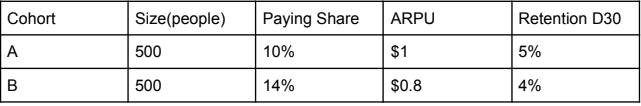

Как вы считаете, когорта с каким балансом перспективнее? Почему?

Если посчитать доход двух когорт (Size(people) * Paying Share * ARPU), то:

* Когорта А = 500 x 10% x 1 = 50$

* Когорта B = 500 х 14% х 0.8 = 56$

Доход от когорты B немного выше из-за большего количества платящих пользователей.
У когорты A немного выше Retention Rate - 5%
ARPU у когорты А также выше - 1$

**Если мы ориентируемся именно на перспективность, то я бы рекомендовал выбрать когорту А, так как она имеет более высокий показатель ARPU и лучший Retention Rate. В перспективе лучше рассматривать немного меньшую доходность, но лучшее удержание.**